# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [81]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [82]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 38
page_size = 100 #total reviews in each page

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [83]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Delayed flight 1 hour. Arbitrar...
1,Not Verified | Flown with BA four times. As an...
2,✅ Trip Verified | You may never see your ref...
3,Not Verified | Cargo service: that's how I fel...
4,✅ Trip Verified | Inefficient and slow airport...


In [84]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

# **Data Cleaning**

In [85]:
import re

# Define a function to clean review text
def clean_review(text):
    # Remove everything before the first '|' including the '|' itself
    text = re.sub(r'^.*?\|\s*', '', text)
    # Remove any remaining unnecessary characters or whitespace
    text = text.strip()
    return text

# Apply the cleaning function to the 'reviews' column
if 'reviews' in df.columns:
    df['reviews'] = df['reviews'].apply(clean_review)

# Display the updated DataFrame
df.head()

,reviews
0,Delayed flight 1 hour. Arbitrary cancellation ...
1,Flown with BA four times. As an anxious travel...
2,You may never see your refund. I cancelled my ...
3,Cargo service: that's how I felt in the A380 u...
4,Inefficient and slow airport operation. Restin...


# **Sentiment Analysis using TextBlob**

In [86]:
from textblob import TextBlob
import pandas as pd

In [88]:
# Define a function to calculate sentiment polarity
# float within the range [-1.0, 1.0]
# negative values = negative sentiment, positive values = positive sentiment.
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis to the 'reviews' column
if 'reviews' in df.columns:
    df['sentiment'] = df['reviews'].apply(get_sentiment)

# Display the updated DataFrame
df.head(20)


,reviews,sentiment
0,Delayed flight 1 hour. Arbitrary cancellation ...,-0.100000
1,Flown with BA four times. As an anxious travel...,0.130000
2,You may never see your refund. I cancelled my ...,-0.066667
3,Cargo service: that's how I felt in the A380 u...,0.088492
4,Inefficient and slow airport operation. Restin...,-0.111719
5,The customer service is one of the worst I hav...,0.018669
6,"Before my flight, I was forced by the ground s...",-0.145280
7,British Airways at its best. Outstanding servi...,0.582037
8,An excellent flight! Despite this being a 4.5 ...,0.296753
9,I recently traveled with British Airways and h...,-0.012778


In [89]:
# Define a function to categorize sentiment
def categorize_sentiment(score):
    if score >= 0:
        return 'Positive'
    else:
        return 'Negative'

# Apply the categorization function to the 'sentiment' column
df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)
df

,reviews,sentiment,sentiment_category
0,Delayed flight 1 hour. Arbitrary cancellation ...,-0.100000,Negative
1,Flown with BA four times. As an anxious travel...,0.130000,Positive
2,You may never see your refund. I cancelled my ...,-0.066667,Negative
3,Cargo service: that's how I felt in the A380 u...,0.088492,Positive
4,Inefficient and slow airport operation. Restin...,-0.111719,Negative
...,...,...,...
3795,London to Barbados and back. After reading som...,0.200000,Positive
3796,London Heathrow to Madrid on a Boeing 767-300....,0.227585,Positive
3797,Recently for our honeymoon we took advantage o...,0.039878,Positive
3798,LGW-Antigua on 29 April and Antigua-LGW on 13 ...,-0.035860,Negative


# **Data Visualization**

In [90]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

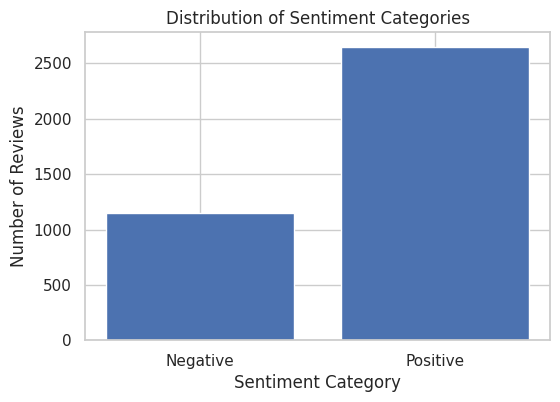

In [91]:
# Bar Chart: Count of Reviews by Sentiment Category
sentiment_counts = df.groupby('sentiment_category').size()
plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.show()

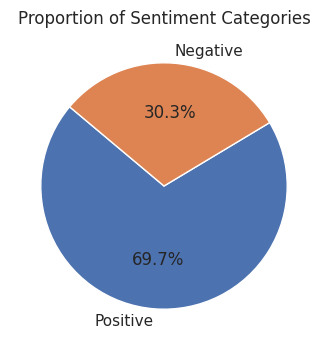

In [92]:
# Pie Chart: Proportion of Sentiment Categories
plt.figure(figsize=(6, 4))
plt.pie(df['sentiment_category'].value_counts(), labels=df['sentiment_category'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Sentiment Categories')
plt.ylabel('')
plt.show()

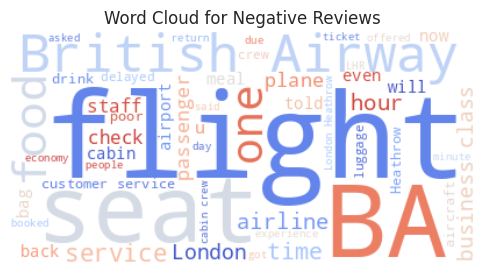

In [93]:
# Word Clouds for neg sentiment category
text = " ".join(review for review in df[df['sentiment_category'] == 'Negative']['reviews'])
wordcloud = WordCloud(background_color="white", colormap='coolwarm', max_words=50).generate(text)
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(f"Word Cloud for Negative Reviews")
plt.show()


### **convert cleaned dataset to csv file**

In [94]:
df.to_csv('cleaned_BA_reviews.csv', index=False)